## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Generate data

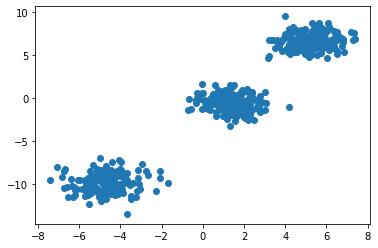

In [2]:
n_samples = 500

X, labels = datasets.make_blobs(n_samples=n_samples)
x_1 = X.T[0]
x_2 = X.T[1]

plt.scatter(x_1, x_2)
plt.show()

## Implement K-means algorithm

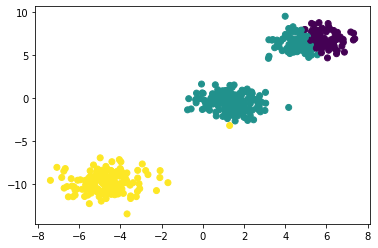

In [3]:
k = 3

random_indices = np.random.randint(0, n_samples, k)
output = []
for index in range(0, n_samples):
    x, y = x_1[index], x_2[index]

    distances = []
    for random_index in random_indices:
        x_r, y_r = x_1[random_index], x_2[random_index]
        distances.append(np.sqrt(np.square(x-x_r) + np.square(y-y_r)))

    lowest_index_distance = np.argmin(distances)
    output.append(np.argmin(distances))

plt.scatter(x_1, x_2, c=output)

## Repeat and compare variances

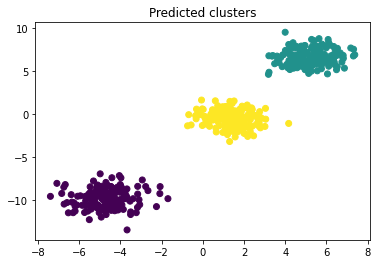

In [4]:
n_attempts = 20

best_output = []
best_sum_variances = None

for i in range(n_attempts):
    random_indices = np.random.randint(0, n_samples, k)
    output = []
    for index in range(0, n_samples):
        x, y = x_1[index], x_2[index]

        distances = []
        for random_index in random_indices:
            x_r, y_r = x_1[random_index], x_2[random_index]
            distances.append(np.sqrt(np.square(x-x_r) + np.square(y-y_r)))

        lowest_index_distance = np.argmin(distances)
        output.append(np.argmin(distances))
            
        
    input_output = list(zip(x_1, x_2, output))
    mean_variances = {}
    for i in range(k):
        values = np.array(list(filter(lambda x: x[2] == i, input_output)))
        avg_x_1 = sum(values.T[0])/len(values)
        avg_x_2 = sum(values.T[1])/len(values)

        total_variance = 0
        for x1, x2, _ in values:
            total_variance += np.sqrt(np.square(x1-avg_x_1) + np.square(x2-avg_x_2))
        mean_variances[i] = total_variance
    sum_variances = sum(mean_variances.values())
    
    if best_sum_variances is None:
        best_sum_variances = sum_variances
        best_output = output
    elif sum_variances < best_sum_variances:
        best_sum_variances = sum_variances
        best_output = output

plt.scatter(x_1, x_2, c=best_output)
plt.title("Predicted clusters")
plt.show()

## Plot ground truth

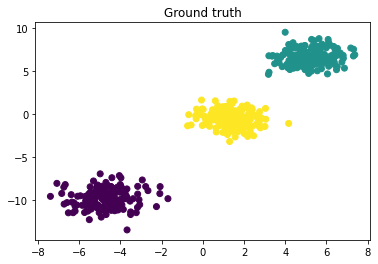

In [5]:
plt.scatter(x_1, x_2, c=labels)
plt.title("Ground truth")
plt.show()